In [5]:
install.packages("shiny") 
install.packages("urltools")
install.packages("leaflet")
install.packages("leaflet.extras")
install.packages("scales")
install.packages("htmlwidgets")
install.packages("sf")
install.packages("dplyr")
install.packages("tmap")

library(raster)
library(RColorBrewer)
library(dplyr)
library("tmap")
library("scales")
library("leaflet")
library("sf")
library("leaflet.extras") #Needed for interactive map

install.packages("rgdal")

library("rgdal")



The downloaded binary packages are in
	/var/folders/_3/c9jvmj8d3mq6r20_fxn1y1_r0000gn/T//RtmpMNsTK9/downloaded_packages

The downloaded binary packages are in
	/var/folders/_3/c9jvmj8d3mq6r20_fxn1y1_r0000gn/T//RtmpMNsTK9/downloaded_packages

The downloaded binary packages are in
	/var/folders/_3/c9jvmj8d3mq6r20_fxn1y1_r0000gn/T//RtmpMNsTK9/downloaded_packages

The downloaded binary packages are in
	/var/folders/_3/c9jvmj8d3mq6r20_fxn1y1_r0000gn/T//RtmpMNsTK9/downloaded_packages

The downloaded binary packages are in
	/var/folders/_3/c9jvmj8d3mq6r20_fxn1y1_r0000gn/T//RtmpMNsTK9/downloaded_packages

The downloaded binary packages are in
	/var/folders/_3/c9jvmj8d3mq6r20_fxn1y1_r0000gn/T//RtmpMNsTK9/downloaded_packages

The downloaded binary packages are in
	/var/folders/_3/c9jvmj8d3mq6r20_fxn1y1_r0000gn/T//RtmpMNsTK9/downloaded_packages

The downloaded binary packages are in
	/var/folders/_3/c9jvmj8d3mq6r20_fxn1y1_r0000gn/T//RtmpMNsTK9/downloaded_packages

The downloaded binary packages 

Loading required package: sp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:raster’:

    intersect, select, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Linking to GEOS 3.9.1, GDAL 3.2.3, PROJ 7.2.1; sf_use_s2() is TRUE




The downloaded binary packages are in
	/var/folders/_3/c9jvmj8d3mq6r20_fxn1y1_r0000gn/T//RtmpMNsTK9/downloaded_packages


Please note that rgdal will be retired by the end of 2023,
plan transition to sf/stars/terra functions using GDAL and PROJ
at your earliest convenience.

rgdal: version: 1.5-28, (SVN revision 1158)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.2.3, released 2021/04/27
Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/4.1-arm64/Resources/library/rgdal/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 7.2.1, January 1st, 2021, [PJ_VERSION: 721]
Path to PROJ shared files: /Library/Frameworks/R.framework/Versions/4.1-arm64/Resources/library/rgdal/proj
PROJ CDN enabled: FALSE
Linking to sp version:1.4-6
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading sp or rgdal.
Overwritten PROJ_LIB was /Library/Frameworks/R.framework/Versions/4.1-arm64/Resources/library/rgdal/proj



In [6]:
getwd()

[1] "/Users/danielkrasovski/Documents/code/Visualizing Data/Lab6"

In [7]:
options(stringsAsFactors = FALSE)

popDatacsv <- "Data/IRCountyPop.csv"

IRshapefile <- "Map/IRshapefile"



In [8]:

ogrListLayers(dsn=IRshapefile)

IRgeo <- readOGR(IRshapefile,layer = "IRL_adm1")

str(IRgeo)

[1] "IRL_adm0" "IRL_adm1"
attr(,"driver")
[1] "ESRI Shapefile"
attr(,"nlayers")
[1] 2

OGR data source with driver: ESRI Shapefile 
Source: "/Users/danielkrasovski/Documents/code/Visualizing Data/Lab6/Map/IRshapefile", layer: "IRL_adm1"
with 26 features
It has 9 fields
Integer64 fields read as strings:  ID_0 ID_1 
Formal class 'SpatialPolygonsDataFrame' [package "sp"] with 5 slots
  ..@ data       :'data.frame':	26 obs. of  9 variables:
  .. ..$ ID_0     : chr [1:26] "109" "109" "109" "109" ...
  .. ..$ ISO      : chr [1:26] "IRL" "IRL" "IRL" "IRL" ...
  .. ..$ NAME_0   : chr [1:26] "Ireland" "Ireland" "Ireland" "Ireland" ...
  .. ..$ ID_1     : chr [1:26] "1" "2" "3" "4" ...
  .. ..$ NAME_1   : chr [1:26] "Carlow" "Cavan" "Clare" "Cork" ...
  .. ..$ TYPE_1   : chr [1:26] "Administrative County" "Administrative County" "Administrative County" "Traditional County" ...
  .. ..$ ENGTYPE_1: chr [1:26] "County" "County" "County" "County" ...
  .. ..$ NL_NAME_1: chr [1:26] NA NA NA NA ...
  .. ..$ VARNAME_1: chr [1:26] "Ceatharlach" "An Cabhán" "An Clár" "Corcaigh" ...
  ..@ p

[1] "Carlow"    "Cavan"     "Clare"     "Cork"      "Donegal"   "Dublin"   
 [7] "Galway"    "Kerry"     "Kildare"   "Kilkenny"  "Laoighis"  "Leitrim"  
[13] "Limerick"  "Longford"  "Louth"     "Mayo"      "Meath"     "Monaghan" 
[19] "Offaly"    "Roscommon" "Sligo"     "Tipperary" "Waterford" "Westmeath"
[25] "Wexford"   "Wicklow"

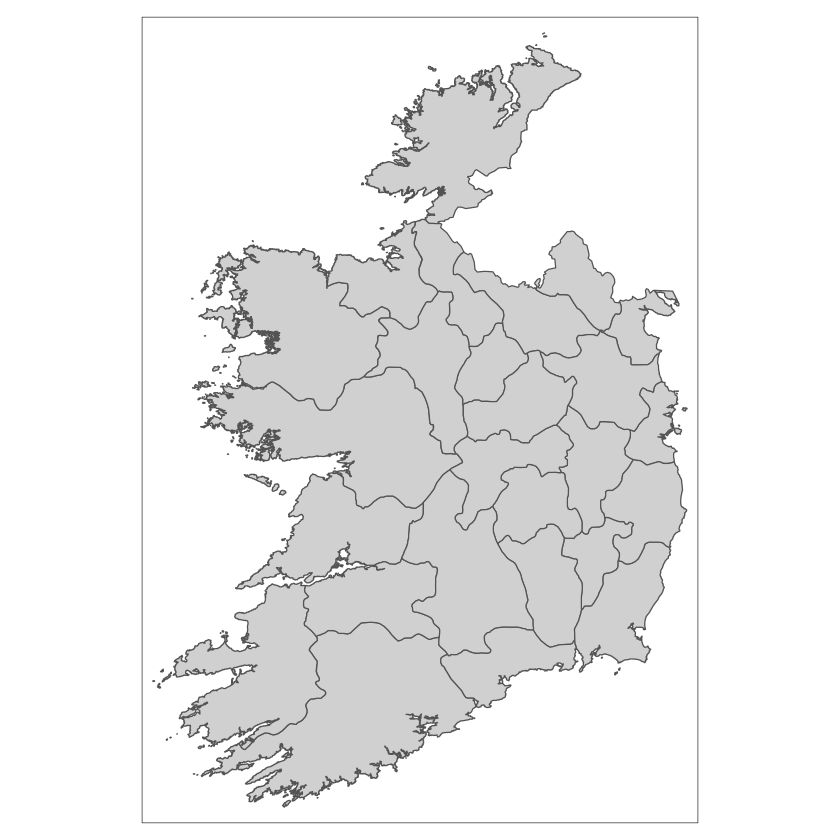

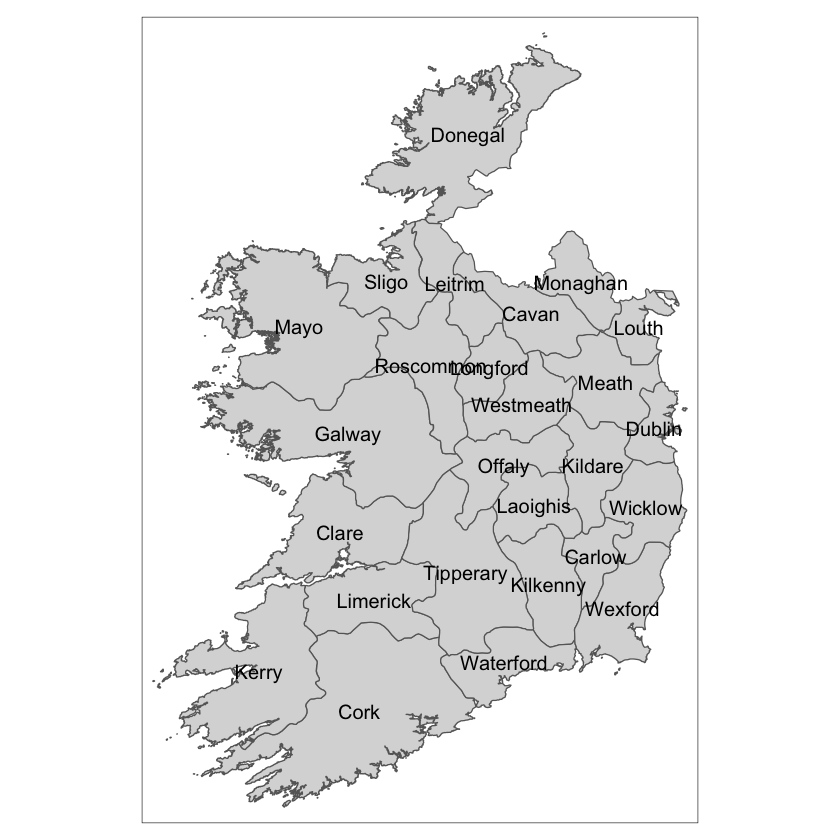

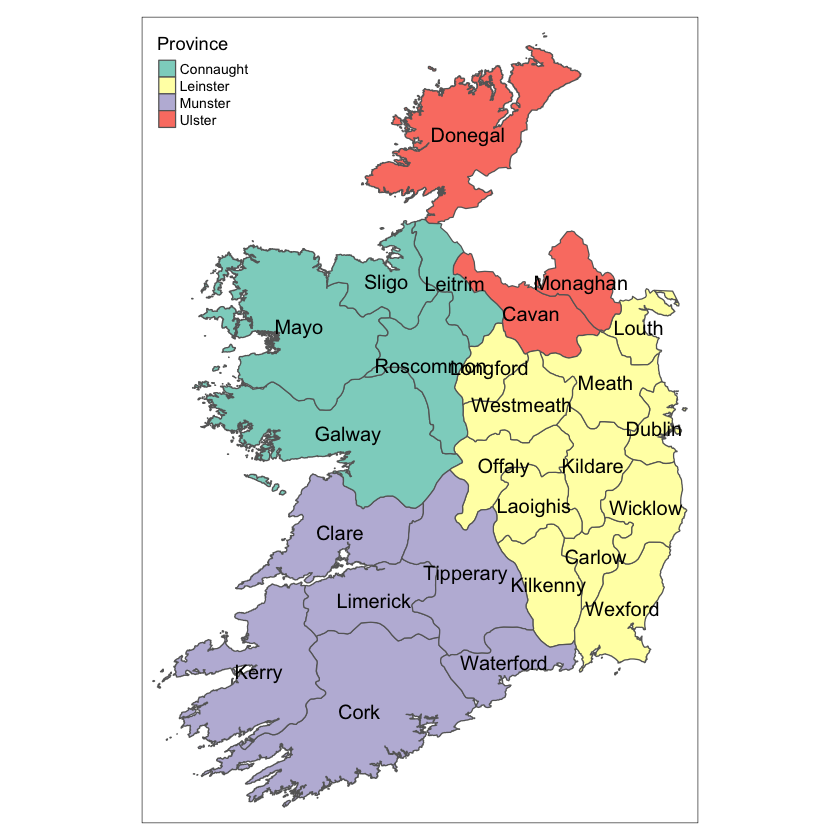

In [16]:

IRgeo$NAME_1

qtm(IRgeo)

IRgeo@data$Province <- sapply(IRgeo@data$NAME_1, switch,                             
                            'Carlow' = 'Leinster',
                            'Cavan' = 'Ulster',
                            'Clare' = 'Munster',
                            'Cork' = 'Munster',
                            'Donegal' = 'Ulster',
                            'Dublin' = 'Leinster',
                            'Galway' = 'Connaught',
                            'Kerry' =  'Munster',
                            'Kildare' = 'Leinster',
                            'Kilkenny' = 'Leinster',
                            'Laoighis' = 'Leinster',
                            'Leitrim' = 'Connaught',
                            'Limerick' =  'Munster',
                            'Longford' = 'Leinster',
                            'Louth' = 'Leinster',
                            'Mayo' = 'Connaught',
                            'Meath' = 'Leinster',
                            'Monaghan' = 'Ulster',
                            'Offaly' = 'Leinster',
                            'Roscommon' = 'Connaught',
                            'Sligo' = 'Connaught',
                            'Tipperary' =  'Munster',
                            'Waterford' =  'Munster',
                            'Westmeath' = 'Leinster',
                            'Wexford' = 'Leinster',
                            'Wicklow' = 'Leinster')


map_1<-function(){print(qtm(IRgeo,text="NAME_1"))};

map_1()

map_2<-function(){print(qtm(IRgeo,text="NAME_1","Province"))};

map_2()

In [10]:
#read in the population data into a dataframe called popdata
popdata <- read.csv(popDatacsv, header=TRUE)
popdata


County,pop1841,pop1851,pop1861,pop1871,pop1881,pop1891,pop1901,pop1911,pop1926,pop1936,pop1951,pop1961,pop1971,pop1981,pop1991,pop2001
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Antrim,361428,360498,372008,398624,413178,416143,543329,578704,608258,635692,661693,677512,663051,579750,591404,617462
Armagh,227190,189091,184138,171142,154515,135444,123018,117783,105693,102646,108739,111701,125461,127607,136469,144178
Carlow,81658,65222,54610,49012,44103,38734,35881,34498,33018,33127,32993,32248,33202,38646,39774,44829
Cavan,243094,173989,153870,140735,129476,111917,97451,91173,82452,76670,66377,56594,49345,53855,52796,56546
Clare,285456,211865,165884,147779,141379,124425,110658,102604,93685,88642,80264,72753,74104,86547,89864,102109
Cork,851528,647088,542486,515804,494312,437216,405517,392951,364906,355253,340784,330018,352534,402162,410073,447483
Derry,222043,191765,184140,173906,164991,152009,144404,140625,141994,143693,156030,165381,250655,252499,297599,334245
Donegal,296448,255160,237390,218499,206166,185750,173772,168447,152508,142310,131530,113842,108344,125112,128117,137575
Down,366202,327617,306236,275922,246697,222973,209891,208566,207736,208578,234610,260769,381594,403308,432022,475998


In [11]:
#merge the two dataframes together
merged <- merge(IRgeo, popdata, by.x="NAME_1", by.y="County")

head(merged)


,NAME_1,ID_0,ISO,NAME_0,ID_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,Province,⋯,pop1901,pop1911,pop1926,pop1936,pop1951,pop1961,pop1971,pop1981,pop1991,pop2001
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Carlow,109,IRL,Ireland,1,Administrative County,County,NA,Ceatharlach,Leinster,⋯,35881,34498,33018,33127,32993,32248,33202,38646,39774,44829
2,Cavan,109,IRL,Ireland,2,Administrative County,County,NA,An Cabhán,Ulster,⋯,97451,91173,82452,76670,66377,56594,49345,53855,52796,56546
3,Clare,109,IRL,Ireland,3,Administrative County,County,NA,An Clár,Munster,⋯,110658,102604,93685,88642,80264,72753,74104,86547,89864,102109
4,Cork,109,IRL,Ireland,4,Traditional County,County,NA,Corcaigh,Munster,⋯,405517,392951,364906,355253,340784,330018,352534,402162,410073,447483
5,Donegal,109,IRL,Ireland,5,Administrative County,County,NA,Dún na nGall|Tyrconnel,Ulster,⋯,173772,168447,152508,142310,131530,113842,108344,125112,128117,137575
6,Dublin,109,IRL,Ireland,6,Administrative County,County,NA,Baile Átha Cliath,Leinster,⋯,454990,492103,494484,586173,693679,718332,852219,1003164,1030638,1122821


Legend labels were too wide. Therefore, legend.text.size has been set to 0.55. Increase legend.width (argument of tm_layout) to make the legend wider and therefore the labels larger.



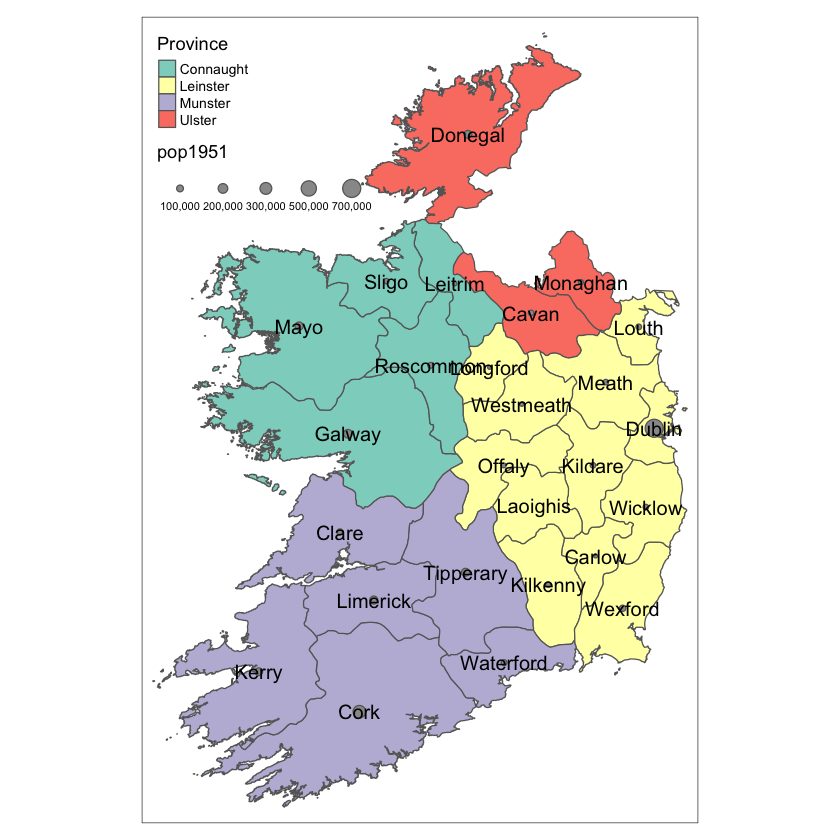

In [12]:

qtm(merged, text="NAME_1", "Province", "pop1951",
    color=brewer.pal(9, "YlOrRd"),
    size=merged$Population/1000,
    legend=TRUE,
    legend.position="topright")


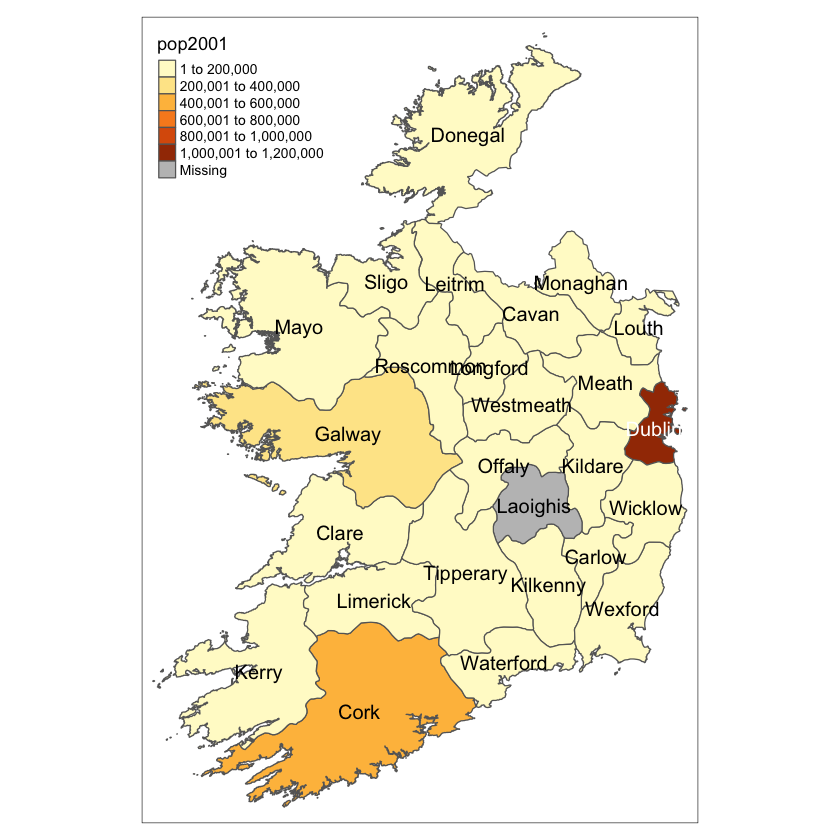

In [13]:
qtm(merged,text="NAME_1", "pop2001")

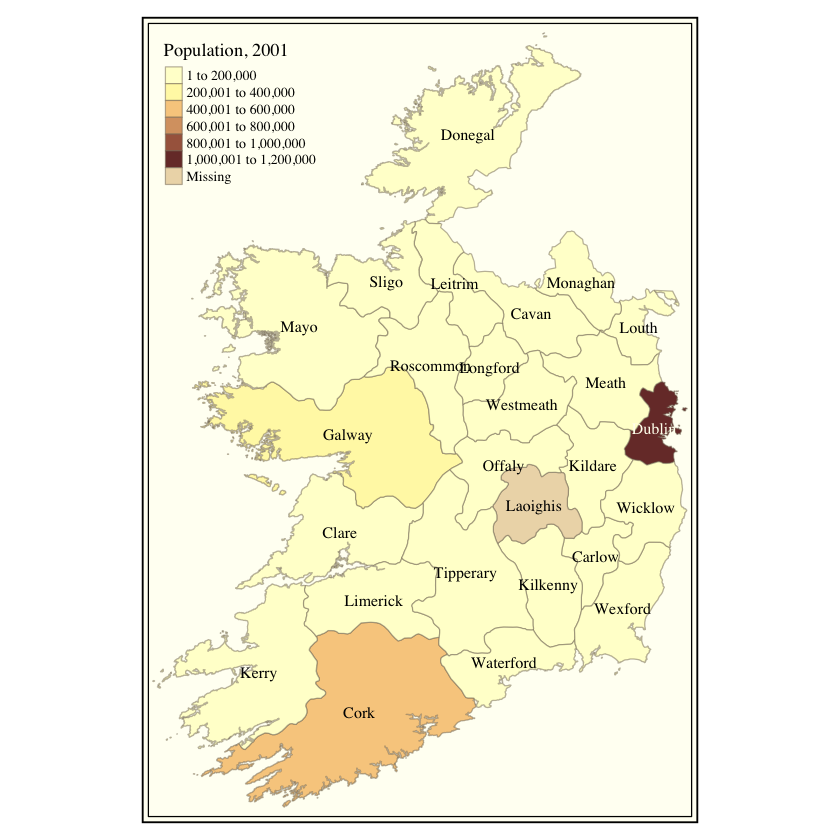

In [14]:

irstaticmap <- tm_shape(merged) +
  tm_fill("pop2001", title="Population, 2001", palette = "YlOrRd")+
  tm_borders(alpha=.5) +
  tm_text("NAME_1",size=0.8) +
  tm_style("classic")
irstaticmap
